In [1]:
import csv
import random
import matplotlib.pyplot as plt

In [37]:
class AcoTsp:
  def __init__(self, filename):
    self.vertexes = []
    self.adj_matrix = []
    self.pheromone_concentration = []
    self.size = 0

    self._create_data(filename)

  def __len__(self):
    return self.size

  def _create_data(self, filename):
    try:
      with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=';')
        n = 0
        for row in reader:
          # append point name (0) and coords (1, 2)
          name, x, y = row[:3]
          adj_vertices = row[3::]
          self.vertexes.append([(n, name), (x, y), adj_vertices])
          n += 1

      for vertex in self.vertexes:
        adj = []
        for j in range(len(self.vertexes)):
          adj.append(1 if str(j) in vertex[2] else 0)
        del vertex[2]
        self.adj_matrix.append(adj)
        self.pheromone_concentration.append([n * (1 / len(adj)) for n in adj])

        self.size = len(self.vertexes)
    except (IOError):
      pass

  def get_possible_vertexes(self, i = 0):
    possible_ways = []
    adj = self.adj_matrix[i]
    for j in range(len(adj)):
      if adj[j] > 0:
        possible_ways.append((self.vertexes[j], self.pheromone_concentration[i][j]))
    return possible_ways

  def is_all_places(self, way):
    return all([v[0][0] in way for v in self.vertexes])

  def inc_pheromone(self, way, fx):
    for i in range(len(way) - 1):
      self.pheromone_concentration[way[i]][way[i+1]] += 1 / fx

  def evaporation(self):
    for i in range(len(self.pheromone_concentration)):
      for j in range(len(self.pheromone_concentration[i])):
        self.pheromone_concentration[i][j] *= 1 - 0.3

  def print_result(self, best_ant):
    locations = [self.vertexes[loc] for loc in best_ant.way]
    loc_names = [loc[0][1] for loc in locations]
    loc_coords = [loc[1] for loc in locations]
    print("Best way: ", ' -> '.join(loc_names))
    x = [int(coord[0]) for coord in loc_coords]
    y = [int(coord[1]) for coord in loc_coords]
    plt.plot(x, y, linestyle='-', color='blue')
    plt.scatter(x, y, marker='.', color='red')
    plt.show()


In [3]:
class Ant:
  def __init__(self):
    self.current_position = 0
    self.way = [self.current_position]

  def restore(self):
    self.__init__()
  
  def choose_vertex(self, possible_vertexes):
    if possible_vertexes == []:
      prev = self.way[-2]
      del self.way[-1]
      self.current_position = prev
      return prev
    rij = [v[1] for v in possible_vertexes]
    sum_rij = sum(rij)
    weights = [r / sum_rij for r in rij]
    next_v = random.choices(possible_vertexes, weights=weights)[0][0][0]
    self.way.append(next_v[0])
    self.current_position = next_v[0]
    return next_v[0]

  def get_way_len(self):
    return len(self.way)


In [ ]:
a = AcoTsp('aco_6.csv')
pos = a.get_possible_vertexes(6)
ant = Ant()
ant.choose_vertex(pos)

In [ ]:
a = [1,2,3,4, 5,6,7,4]
n,m,z = a[:3]
print(n,m,z)
del a[3::]
print(a)

1 2 3
[1, 2, 3]


In [33]:
ANTS_COUNT = 20
GENERATIONS_COUNT = 30

I  1 [0, 1, 2, 1, 2, 3, 2, 1, 3, 4, 1, 3, 2, 3, 4, 1, 3, 2, 1, 3, 2, 3, 4, 1, 3, 4, 1, 3, 4, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 3, 4, 1, 3, 4, 1, 2, 3, 2, 1, 2, 3, 4, 5, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 4, 1, 3, 4, 1, 2, 3, 2, 1, 3, 4, 5, 1, 2, 1, 2, 1, 2, 3, 4, 1, 2, 3, 2, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 2, 1, 2, 3, 2, 3, 4, 5, 1, 2, 3, 2, 1, 2, 1, 3, 4, 5, 6]
I  1 [0, 1, 3, 4, 1, 3, 4, 5, 1, 3, 2, 3, 4, 5, 2, 1, 3, 4, 1, 2, 1, 3, 2, 1, 3, 4, 5, 6]
I  1 [0, 3, 2, 1, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 4, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 3, 2, 3, 2, 3, 4, 5, 2, 1, 3, 2, 1, 2, 1, 2, 1, 3, 4, 5, 2, 3, 4, 1, 3, 2, 3, 2, 1, 3, 4, 5, 6]
I  1 [0, 3, 2, 3, 4, 5, 1, 2, 1, 3, 4, 1, 3, 4, 5, 2, 3, 2, 1, 3, 2, 1, 2, 3, 4, 1, 2, 1, 2, 1, 3, 4, 1, 2, 1, 2, 3, 2, 3, 2, 1, 2, 3, 4, 1, 3, 2, 1, 2, 1, 3, 4, 1, 2, 1, 2, 1, 3, 2, 3, 4, 1, 2, 3, 4, 5, 1, 3, 4, 1, 3, 2, 3, 2, 3, 4, 5, 2, 1, 2, 3, 2, 1, 3, 4, 5, 1, 3, 4, 5, 1, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 2, 3, 2, 1, 2

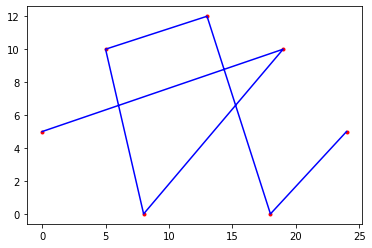

In [51]:
aco = AcoTsp('aco_6.csv')
ants = [Ant() for i in range(ANTS_COUNT)]
best = None

t = 0
while t < GENERATIONS_COUNT:
  t += 1
  for ant in ants:
    ant.restore()
    while True:
      possible_ways = aco.get_possible_vertexes(ant.current_position)
      v = ant.choose_vertex(possible_ways)
      if v == len(aco)-1 and aco.is_all_places(ant.way):
        break
    print('I ', t, ant.way)

  aco.evaporation()
  for ant in ants:
    aco.inc_pheromone(ant.way, ant.get_way_len())
  local_best = sorted(ants, key=lambda ant: ant.get_way_len())[0]
  if not best == None:
    print(best.get_way_len(), local_best.get_way_len(), local_best.get_way_len() < best.get_way_len())
  if best == None or local_best.get_way_len() < best.get_way_len():
    del best
    best = Ant()
    best.way = local_best.way.copy()

aco.print_result(best)